Omar Mancilla Martínez

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import tree
import graphviz
from IPython.display import Image

# Proyecto Sprint 8: Prediccion con Machine learning, Planes telefonicos.

## Introducción: 
Se busca implementar un modelo de machine learning que recomiende planes adecuados a usuarios de planes de legado.

Los objetivos de este notebook son:
- Dividir el dataset en *entrenamiento*, *validación* y *prueba*.
- Generar y entrenar multiples modelos de machine learning.
- Evaluar los modelos con el conjunto de validación.
- Implementar el modelo de mayor exactitud.
- Evaluar el modelo con datos de prueba.
- Realizar una prueba de cordura.



El preprocesamiento de los datos se ha realizado previamente, aun asi daremos un vistado a estos:


### Diccionario de datos:

Cargaremos los datos en DF, donde:
- *сalls* — número de llamadas
- *minutes* — duración total de la llamada en minutos
- *messages* — número de mensajes de texto
- *mb_used* — Tráfico de Internet utilizado en MB
- *is_ultra* — plan para el mes actual (Ultra - 1, Smart - 0)

### Carga de datos

In [2]:
df = pd.read_csv("./datasets/users_behavior.csv")
df.sample(10)

,calls,minutes,messages,mb_used,is_ultra
1530,10.0,94.06,8.0,621.63,1
1244,61.0,424.30,65.0,34888.18,1
1217,38.0,244.50,27.0,22060.68,0
3054,54.0,395.75,0.0,29017.78,1
823,42.0,290.69,77.0,21507.03,0
2119,26.0,172.87,16.0,6431.26,0
2252,133.0,949.36,0.0,19036.43,1
1380,30.0,226.20,28.0,10332.55,0
981,38.0,254.26,0.0,7928.78,1
1149,51.0,363.92,38.0,21730.26,1


### Pre-Procesamiento de datos

Buscaremos datos nulos, duplicados y similares en los datos.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [5]:
df.isnull().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

In [6]:
df.duplicated().sum()

0

Notamos que:
- No hay datos nulos
- No hay duplicados
- *calls*, *minutes*, *messages* y *mb_used* parecen estar uniformemente distribuidos.

De esta exploración se puede notar que:
- Tenemos cuatro caracteristicas (*calls,	minutes,	messages,	mb_used*) 
- tenemos un objetivo (is_ultra) para entrenar nuestro modelo.
- los datos parecen en buen estado por el pre-procesamiento realizado previamente.

## División del dataset:
Debido a que no existe un dataset de prueba, dividiremos el DF en tres:
- Entrenamiento: df_train 60%
- Validación: df_val 20%
- Prueba: df_test 20%

In [7]:
features = df[["calls", "minutes", "messages", "mb_used"]]
target = df["is_ultra"]

features_train, features_valid, target_train, target_valid = train_test_split(features, target, random_state=54321, test_size =0.4) #En esta sentencia los datasets "valid" son usados de forma auxiliar,
#pues estan por ser redefinidos.
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, random_state=54321, test_size =0.5)

## Generar modelos de machine learning:

Debido a que nuestro objetivo es categorico, "0" o "1" para determinar el tipo de plan, requerimos un modelo de clasificación, para ello empezaremos generando tres tipos de modelo: desicion tree, random forest y logistic regression; evaluaremos su implementación con distintos hiperparametros y decidiremos cual es el adecuado.


#### Árbol de decisión de regresión


In [8]:
best_model = None
best_accuracy_tree = 0
best_depth = 0

for depth in range(1,50):
    model=DecisionTreeClassifier(random_state=12345,max_depth=depth)
    model.fit(features_train, target_train)
    predictions_valid =model.predict(features_valid)
    accuaracy= accuracy_score(target_valid, predictions_valid)
    if accuaracy > best_accuracy_tree:
        best_model_tree = model
        best_accuracy_tree = accuaracy
        best_depth = depth

print(f"Accuracy del mejor modelo en el conjunto de validación (max_depth = {best_depth}): {best_accuracy_tree}")

Accuracy del mejor modelo en el conjunto de validación (max_depth = 10): 0.7791601866251944


#### Bosque aleatorio de clasificación.


In [9]:
best_accuracy_forest= 0 
best_depth = 0
for est in range(1, 51, 1):
    for depth in range (1, 11):
        model = RandomForestClassifier(random_state=54321, n_estimators=est , max_depth=depth)# inicializa el constructor de modelos con los parámetros random_state=54321, n_estimators=est y max_depth=depth
        model.fit(features_train,target_train) # entrena el modelo en el conjunto de entrenamiento
        predictions_valid = model.predict(features_valid) # obtén las predicciones del modelo en el conjunto de validación
        accuaracy = accuracy_score(target_valid, predictions_valid)
        if accuaracy > best_accuracy_forest:
            best_model_forest = model
            best_accuracy_forest = accuaracy
            best_depth = depth
            best_est=est

print("exactitud del mejor modelo en el conjunto de validación:", best_accuracy_forest, "n_estimators:", best_est, "best_depth:", best_depth)

exactitud del mejor modelo en el conjunto de validación: 0.80248833592535 n_estimators: 8 best_depth: 10


#### Regresión logistica


In [10]:
model_logistic = LogisticRegression()# inicializa el constructor de modelos
model_logistic.fit(features_train, target_train) # entrena el modelo en el conjunto de entrenamiento
predictions_valid = model_logistic.predict(features_valid) # obtén las predicciones del modelo en el conjunto de validación

best_accuracy_logistic = accuracy_score(target_valid, predictions_valid)
print("la exactitud del modelo de regresión logistica en el conjunto de validación es:", best_accuracy_logistic)

la exactitud del modelo de regresión logistica en el conjunto de validación es: 0.7076205287713841


## Evaluación de los modelos:

Procederemos a coomparar los errores minimos que generaron los modelos:

In [11]:
display("arbol de clasificación",best_accuracy_tree,"bosque aleatorio",best_accuracy_forest,"regresion logistica",best_accuracy_logistic, "Por lo tanto el mejor modelo es bosque aleatorio")

'arbol de clasificación'

0.7791601866251944

'bosque aleatorio'

0.80248833592535

'regresion logistica'

0.7076205287713841

'Por lo tanto el mejor modelo es bosque aleatorio'

El mejor modelo es **Bosque aleatorio**.

Podemos entender que este modelo sea el mas acertado, esto debido a la cantidad de parametros que posee; el bosque aleatorio es el modelo mas completo de los tres usados en este proyecto.

Podemos vizualizar la complejidad del modelo con el siguiente diagrama:


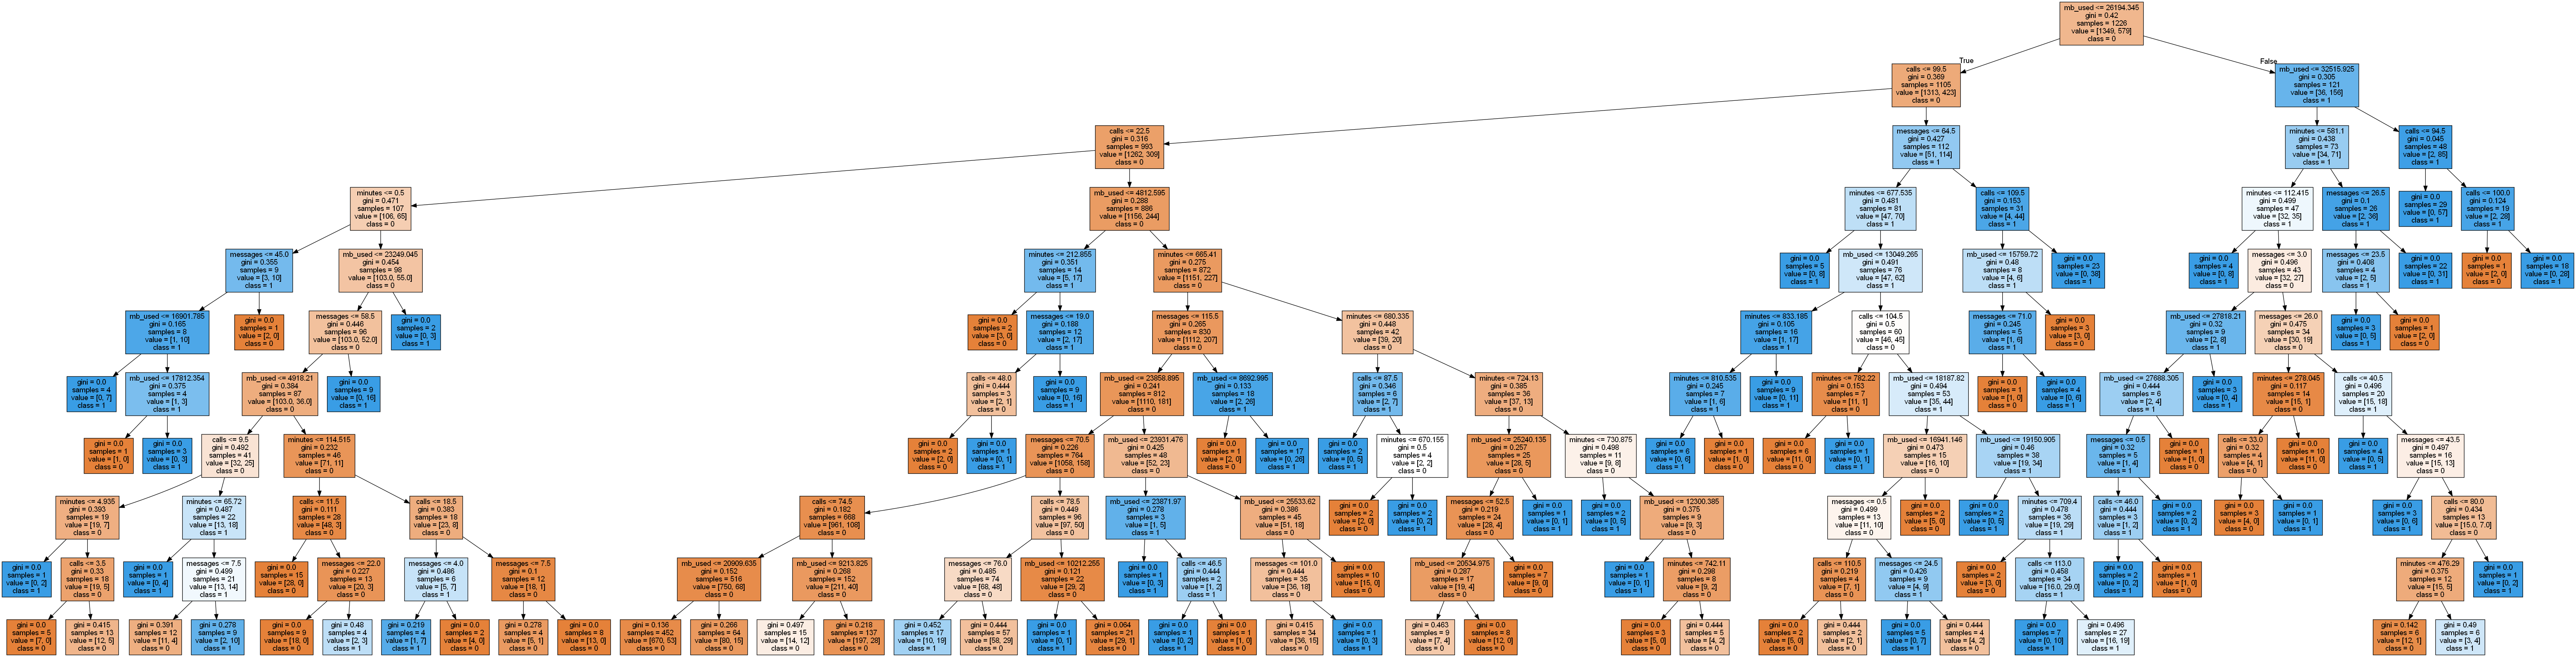

In [15]:
estimator=best_model_forest.estimators_[1]
features=np.array(["calls", "minutes", "messages", "mb_used"])
classes=np.array(["0", "1"])
dot_data = tree.export_graphviz(estimator, out_file=None, 
                                feature_names=features,  
                                class_names=classes,
                                filled=True)

# Creamos el gráfico con Graphviz
graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render("tree")
Image(filename="./tree.png")

Donde este ultimo es solo uno de los 11 arboles generados por el bosque aleatorio.

### Evaluacion de los modelos con el conjunto de prueba:
Ahora evaluaremos el modelo con los datos de prueba:

In [16]:
predictions_test = best_model_forest.predict(features_test)

print("la exactitud del modelo de bosque aleatorio en el conjunto de prueba es:", accuracy_score(target_test, predictions_test))

la exactitud del modelo de bosque aleatorio en el conjunto de prueba es: 0.8227060653188181


Para datos nunca antes vistos, el modelo tiene una precisión alta de $0.822$

en cambio, la exactitud para los demas modelos seria:

In [17]:
predictions_test= best_model_tree.predict(features_test)

print("la exactitud del modelo de arbol de clasificación en el conjunto de prueba es:", accuracy_score(target_test, predictions_test))

predictions_test= model_logistic.predict(features_test)

print("la exactitud del modelo de regresión logistica en el conjunto de prueba es:", accuracy_score(target_test, predictions_test))


la exactitud del modelo de arbol de clasificación en el conjunto de prueba es: 0.80248833592535
la exactitud del modelo de regresión logistica en el conjunto de prueba es: 0.7869362363919129


Con una exactitud de $0.80$ el arbol de clasificación tiene buenos resultados, considerando que su entrenamiento es mas simple.

Por otro lado el modelo de regresión logistica es el que peores resultados tiene con una exactitud de $0.78$

## Prueba de cordura
Finalmente realizaremos una prueba de cordura.
Si el modelo asignara aleatoriamente valores, la exactitud para *"is_ultra"=0"* y *"is_ultra"=1"* seriá de $0.5$ para cada uno, pues no hay diferencias entre cada clase, dando $0.5$ de exactituda global. 
La exactitud del modelo es bastante superior a 0.5, dandonos a entender que nuestro resultado no es obra de la casualidad.

Ahora usamos un modelo dummy de clasificación, el cual predice aplicando unicamente la clase mas frecuente:

In [18]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(features_train, target_train)
dummy_clf.score(features_test, target_test)


0.7247278382581649

Con un score de $0.72$, vemos que nuestros modelos siguen teniendo una exactitud mayor a la este modelo.

## Conclusiónes:

En este proyecto:
- Se dividió el dataset en *entrenamiento*, *validación* y *prueba* en proporciones $60\%, 20\%, 20\%$.
- Se generaron y entrenaron multiples modelos de machine learning de tres tipos:
    - Arbol de clasificación.
    - Bosque aleatorio de clasificación.
    - Regresión logistica.
- Se evaluaron los mejores modelos de cada tipo con el conjunto de validación, obteniendo los mejores resultados del **Bosque aleatorio de clasificación**.
- Se evaluó el modelo con datos de prueba, obteniendo una exactitud de $80\%$.
- Se revisó que los resultados tuvieran sentido.

### Conclusión general:

El modelo generado mas optimo fue un bosque aletorio de clasificación, con una exactitud del $80\%$ representa una forma relativamente sencilla y efectiva de resolver el problema de que plan recomendar a que usuario.
